In [1]:
#read data from my collection and store it in database 

import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import pandas as pd

In [2]:

cred = credentials.Certificate('claves.json')
firebase_admin.initialize_app(cred)


In [3]:
# Use a service account.
cred = credentials.Certificate('claves.json')
db = firestore.client()

In [4]:
# Read from the review collection
houses_ref = db.collection('cleaned_data')

#get all the info
houses = houses_ref.get()


In [5]:
len(houses)

815

In [6]:
# Create an empty dataframe
data = pd.DataFrame()

# Iterate over the houses and add each house's data to the dataframe
for house in houses:
    house_data = house.to_dict()
    data = data.append(house_data, ignore_index=True)

C:\Users\beatr\AppData\Local\Temp\ipykernel_7172\3435397654.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_7172\3435397654.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_7172\3435397654.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_7172\3435397654.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=Tr

In [7]:
data.head()

,hasLift,hasParking,description,municipality,longitude,typology,price,bathrooms,exterior,status,...,district,rooms,priceByArea,propertyCode,size,country,newDevelopment,province,latitude,floor
0,True,no,Piso en venta de un dormitorio con baño y coci...,Madrid,-3.696292,flat,425000.0,1,True,good,...,Centro,1,7456.0,104112121,57.0,es,False,Madrid,40.419431,1
1,True,no,ADELANTE ofrece maravilloso piso de diseño a e...,Madrid,-3.720573,flat,975000.0,4,True,good,...,Moncloa,3,5838.0,104137339,167.0,es,False,Madrid,40.428505,4
2,True,yes,"Piso muy amplio, exterior, al lado del retiro....",Madrid,-3.686639,flat,2300000.0,3,True,good,...,Retiro,3,9583.0,104160910,240.0,es,False,Madrid,40.406327,5
3,False,no,Novahome presenta estupendo piso completamente...,Madrid,-3.710215,flat,177000.0,1,True,good,...,Centro,1,5900.0,104130100,30.0,es,False,Madrid,40.407592,bj
4,True,no,¡Increíble oportunidad de compra en el Barrio ...,Madrid,-3.696049,flat,1179000.0,3,True,good,...,Centro,3,9744.0,104076070,121.0,es,False,Madrid,40.412279,3


In [8]:
def get_metrics (y_real, y_pred): 
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_percentage_error
    import numpy as np
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    #put it in a df
    metrics = pd.DataFrame({'mse': [mse], 'rmse': [rmse], 'mae': [mae], 'r2': [r2], 'mape': [mape]})
    return metrics



In [19]:
#only numeric data
data_numeric = data.select_dtypes(include=['float64', 'int64'])

In [20]:
data_numeric.head()

,longitude,price,bathrooms,rooms,priceByArea,size,latitude
0,-3.696292,425000.0,1,1,7456.0,57.0,40.419431
1,-3.720573,975000.0,4,3,5838.0,167.0,40.428505
2,-3.686639,2300000.0,3,3,9583.0,240.0,40.406327
3,-3.710215,177000.0,1,1,5900.0,30.0,40.407592
4,-3.696049,1179000.0,3,3,9744.0,121.0,40.412279


### 1) Linear Regression using only the numeric variables 

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
# Normalize the data in data_numeric excluding the target variable
data_normalized_cand = data_numeric.drop('price', axis=1)   
data_normalized = (data_normalized_cand - data_normalized_cand.mean()) / data_normalized_cand.std()


In [64]:
data_normalized.head()

,longitude,bathrooms,rooms,priceByArea,size,latitude
0,-0.020850,-0.794346,-1.158140,0.340202,-0.690995,-0.079055
1,-1.233298,1.877149,0.324789,-0.192004,0.691457,0.441898
2,0.461169,0.986650,0.324789,1.039832,1.608903,-0.831387
3,-0.716081,-0.794346,-1.158140,-0.171611,-1.030324,-0.758754
4,-0.008701,0.986650,0.324789,1.092790,0.113341,-0.489666


In [72]:
X_train, X_test, y_train, y_test = train_test_split(data_normalized, data_numeric["price"], test_size=0.33, random_state=42)

In [73]:
#Creo modelo 
reg = LinearRegression().fit(X_train, y_train)

In [74]:
#Predigo
y_pred = reg.predict(X_test)

    METRICS : En un contexto de predicción de precios de casas, la métrica que nos interesará utilizar es una que esté en las mismas unidades que el precio de las casas, por ejemplo, MAE o RMSE

In [75]:
#vif coefficients of data_numeric
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data_numeric.drop("price", axis=1))
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)


const          6.347466e+06
longitude      1.086207e+00
bathrooms      3.513668e+00
rooms          2.537789e+00
priceByArea    1.680564e+00
size           3.534612e+00
latitude       1.138794e+00
dtype: float64

In [76]:
# Access the coefficients
coefficients = reg.coef_
intercept = reg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-20097.05049201 -18233.59587336 -86906.36797697 424730.73131412
 719869.25383374 -45219.83386613]
Intercept: 804359.8607573081


In [148]:
#r2_adjusted 
def adjusted_r_squared(r_squared, n_samples, n_predictors):
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_predictors - 1))
    return adjusted_r_squared


In [77]:
get_metrics(y_test, y_pred)

,mse,rmse,mae,r2,mape
0,1.456996e+11,381706.109244,197125.187042,0.894891,0.398321


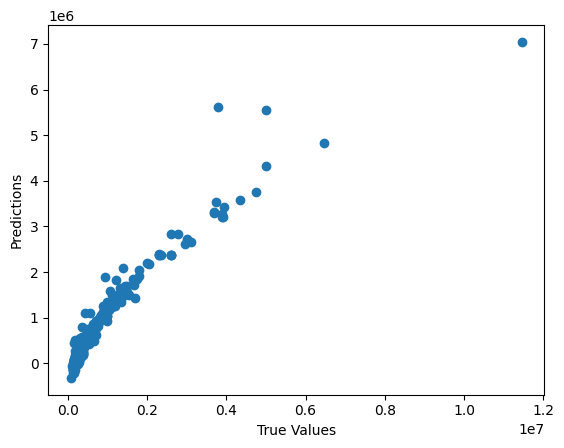

In [20]:
# plot 
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


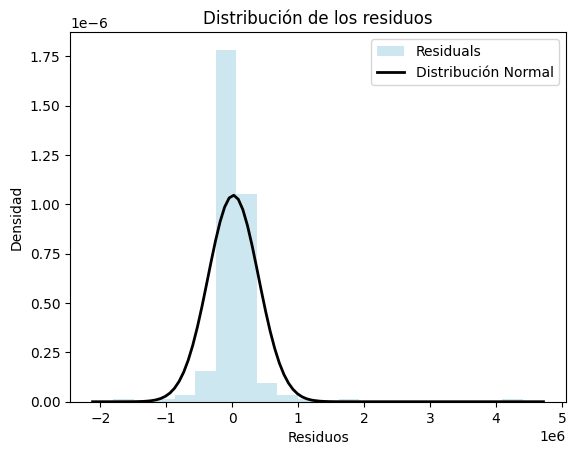

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='lightblue', label='Residuals')

# Fit a normal distribution to the residuals
mu, std = norm.fit(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal')

# Add labels and legend
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title('Distribución de los residuos')
plt.legend()

# Show plot
plt.show()


In [24]:
data_normalized.columns

Index(['longitude', 'bathrooms', 'rooms', 'priceByArea', 'size', 'latitude'], dtype='object')

In [33]:
#linear regression without priceByArea 

data_numeric_2 = data_numeric.drop(["priceByArea", "price"], axis=1)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_numeric_2, data_numeric["price"], test_size=0.33, random_state=42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train) 





LinearRegression()

In [34]:
data_numeric.columns

Index(['longitude', 'price', 'bathrooms', 'rooms', 'priceByArea', 'size',
       'latitude'],
      dtype='object')

In [35]:
y_pred= model_2.predict(X_test)

In [36]:
get_metrics(y_test, y_pred)

,mse,rmse,mae,r2
0,2.796586e+11,528827.571255,286466.706452,0.798252


### 2) Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor 

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hasLift         815 non-null    bool   
 1   hasParking      815 non-null    object 
 2   description     815 non-null    object 
 3   municipality    815 non-null    object 
 4   longitude       815 non-null    float64
 5   typology        815 non-null    object 
 6   price           815 non-null    float64
 7   bathrooms       815 non-null    int64  
 8   exterior        815 non-null    bool   
 9   status          815 non-null    object 
 10  distance        815 non-null    object 
 11  neighborhood    815 non-null    object 
 12  district        815 non-null    object 
 13  rooms           815 non-null    int64  
 14  priceByArea     815 non-null    float64
 15  propertyCode    815 non-null    object 
 16  size            815 non-null    float64
 17  country         815 non-null    obj

In [13]:
#drop the columns description and propertyCode
data.drop(columns=["description", "propertyCode", "distance"], inplace=True)

In [14]:
data_categorical = data.select_dtypes(include=['object'])
data_categorical.columns

Index(['hasParking', 'municipality', 'typology', 'status', 'neighborhood',
       'district', 'country', 'province', 'floor'],
      dtype='object')

In [15]:
data_boolean = data.select_dtypes(include=['bool'])
data_boolean.columns

Index(['hasLift', 'exterior', 'newDevelopment'], dtype='object')

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical variables
encoded_data = encoder.fit_transform(data_categorical)

# Convert the encoded data to a dataframe
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(data_categorical.columns))


In [17]:
encoded_df.columns

Index(['hasParking_no', 'hasParking_yes', 'municipality_Madrid',
       'typology_flat', 'typology_flat duplex', 'typology_flat penthouse',
       'typology_flat studio', 'status_good', 'status_newdevelopment',
       'status_renew',
       ...
       'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8', 'floor_9',
       'floor_bj', 'floor_en', 'floor_ss', 'floor_st'],
      dtype='object', length=126)

In [21]:

# Concatenate the encoded dataframe with the numeric dataframe
encoded_data = pd.concat([data_numeric, encoded_df, data_boolean], axis=1)


encoded_data

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_data.drop("price", axis=1), encoded_data["price"] , test_size=0.33, random_state=42)


In [46]:
#grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 250, 300],
    'max_depth': [10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)



{'max_depth': 40, 'n_estimators': 250}


In [49]:
# Create the model with the best parameters
rf = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'])
rf.fit(X_train, y_train)

# Predict the target variable
y_pred = rf.predict(X_test)

get_metrics(y_test, y_pred)

,mse,rmse,mae,r2
0,2.269748e+11,476418.737223,95457.402275,0.836258


In [59]:
#get MAPE 

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred)

6.337529310980819

In [52]:
grid_metrics = pd.DataFrame(grid_search.cv_results_)

In [57]:
grid_mean_scores = grid_metrics["mean_test_score"]

# absolute values of grid_mean_scores
abs_grid_mean_scores = abs(grid_mean_scores)

Text(0.5, 1.0, 'Mean Absolute Error for different parameters')

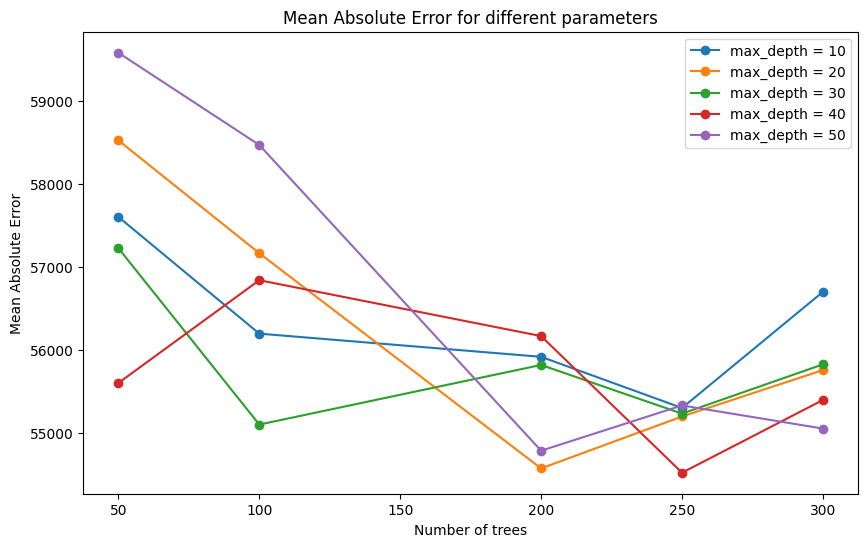

In [58]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.array([50, 100, 200, 250, 300]), abs_grid_mean_scores[:5], '-o', label='max_depth = 10')
plt.plot(np.array([50, 100, 200, 250, 300]), abs_grid_mean_scores[5:10], '-o', label='max_depth = 20')
plt.plot(np.array([50, 100, 200, 250, 300]), abs_grid_mean_scores[10:15], '-o', label='max_depth = 30')
plt.plot(np.array([50, 100, 200, 250, 300]), abs_grid_mean_scores[15:20], '-o', label='max_depth = 40')
plt.plot(np.array([50, 100, 200, 250, 300]), abs_grid_mean_scores[20:25], '-o', label='max_depth = 50')

plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for different parameters')

In [51]:
# Get the feature importances
feature_importances = rf.feature_importances_

# Create a dataframe with the feature importances

feature_importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Sort the dataframe by the feature importances
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Display the 10 most important features
feature_importances_df.head(10)

,feature,importance
4,size,0.698729
3,priceByArea,0.262772
1,bathrooms,0.021956
0,longitude,0.003527
5,latitude,0.002580
2,rooms,0.001296
83,neighborhood_Recoletos,0.001169
120,floor_2,0.000978
122,floor_4,0.000418
33,neighborhood_Castellana,0.000383


# XGBoost

In [23]:
from xgboost import XGBRegressor

# Create an instance of the XGBRegressor
xgb = XGBRegressor()

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Predict the target variable
y_pred = xgb.predict(X_test)

# Calculate the metrics
metrics = get_metrics(y_test, y_pred)
metrics


,mse,rmse,mae,r2,mape
0,1.913389e+11,437423.001384,98788.295917,0.861966,0.070219


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create an instance of the XGBRegressor
xgb = XGBRegressor()

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Negative Mean Squared Error: -23090818862.585808
